In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salmaneunus/railway-track-fault-detection

Dataset URL: https://www.kaggle.com/datasets/salmaneunus/railway-track-fault-detection
License(s): copyright-authors
100% 1.99G/2.00G [00:31<00:00, 86.6MB/s]
100% 2.00G/2.00G [00:31<00:00, 67.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/railway-track-fault-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
train_add = '/content/Railway Track fault Detection Updated/Train'
test_add = '/content/Railway Track fault Detection Updated/Test'
validation_add = '/content/Railway Track fault Detection Updated/Validation'

In [5]:
train_def = pd.DataFrame(os.listdir(train_add + '/Defective'))
train_ndef = pd.DataFrame(os.listdir(train_add + '/Non defective'))
test_def = pd.DataFrame(os.listdir(test_add + '/Defective'))
test_ndef = pd.DataFrame(os.listdir(test_add + '/Non defective'))
val_def = pd.DataFrame(os.listdir(validation_add + '/Defective'))
val_ndef = pd.DataFrame(os.listdir(validation_add + '/Non defective'))

In [6]:
print("Size of training dataset: ", len(train_def)+len(train_ndef))
print("Size of test dataset: ", len(test_def)+len(test_ndef))
print("Size of validation dataset: ", len(val_def)+len(val_ndef))

Size of training dataset:  300
Size of test dataset:  22
Size of validation dataset:  62


In [7]:
print("Train Defective count:", len(train_def))
print("Train Non defective count", len(train_ndef))
print("Test Defective count:", len(test_def))
print("Test Non defective count", len(test_ndef))
print("Validation Defective count:", len(val_def))
print("Validation Non defective count", len(val_ndef))

Train Defective count: 150
Train Non defective count 150
Test Defective count: 11
Test Non defective count 11
Validation Defective count: 31
Validation Non defective count 31


Defective data sample



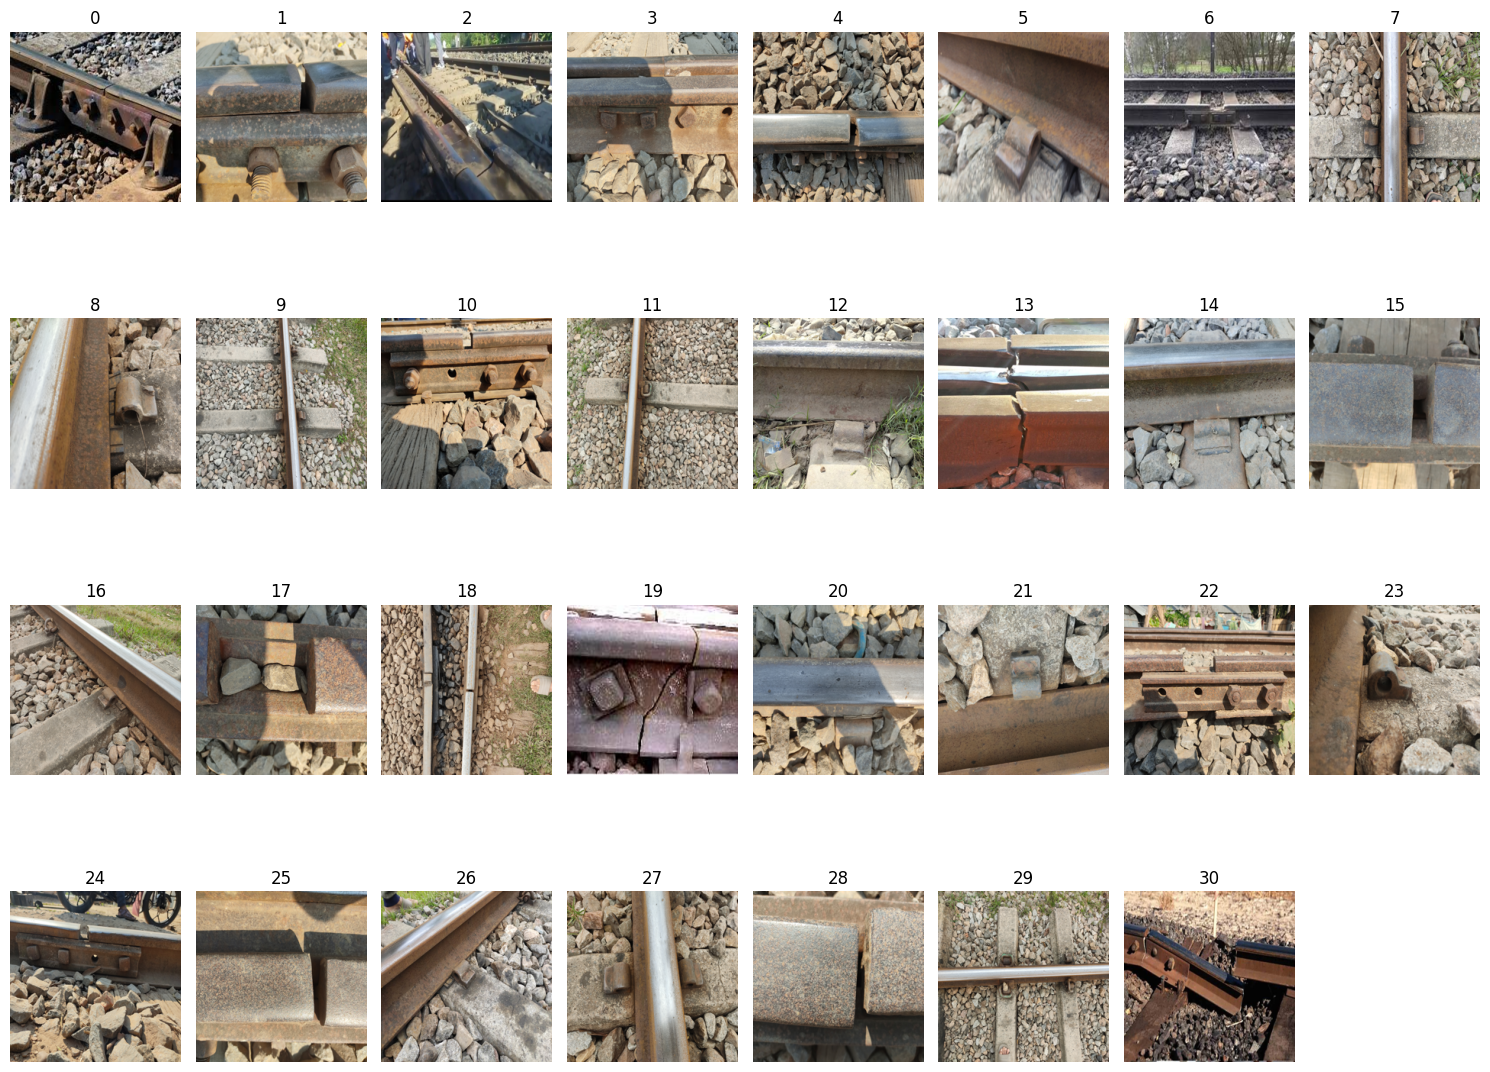

In [10]:
print("Defective data sample\n")
plt.figure(figsize = (15,12))
for idx,image_path in enumerate(train_def[0]):
    if idx==31:
        break
    plt.subplot(4,8,idx+1)
    img = Image.open('/content/Railway Track fault Detection Updated/Train/Defective/'+image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(idx)
plt.tight_layout()
plt.show()

Non defective data sample



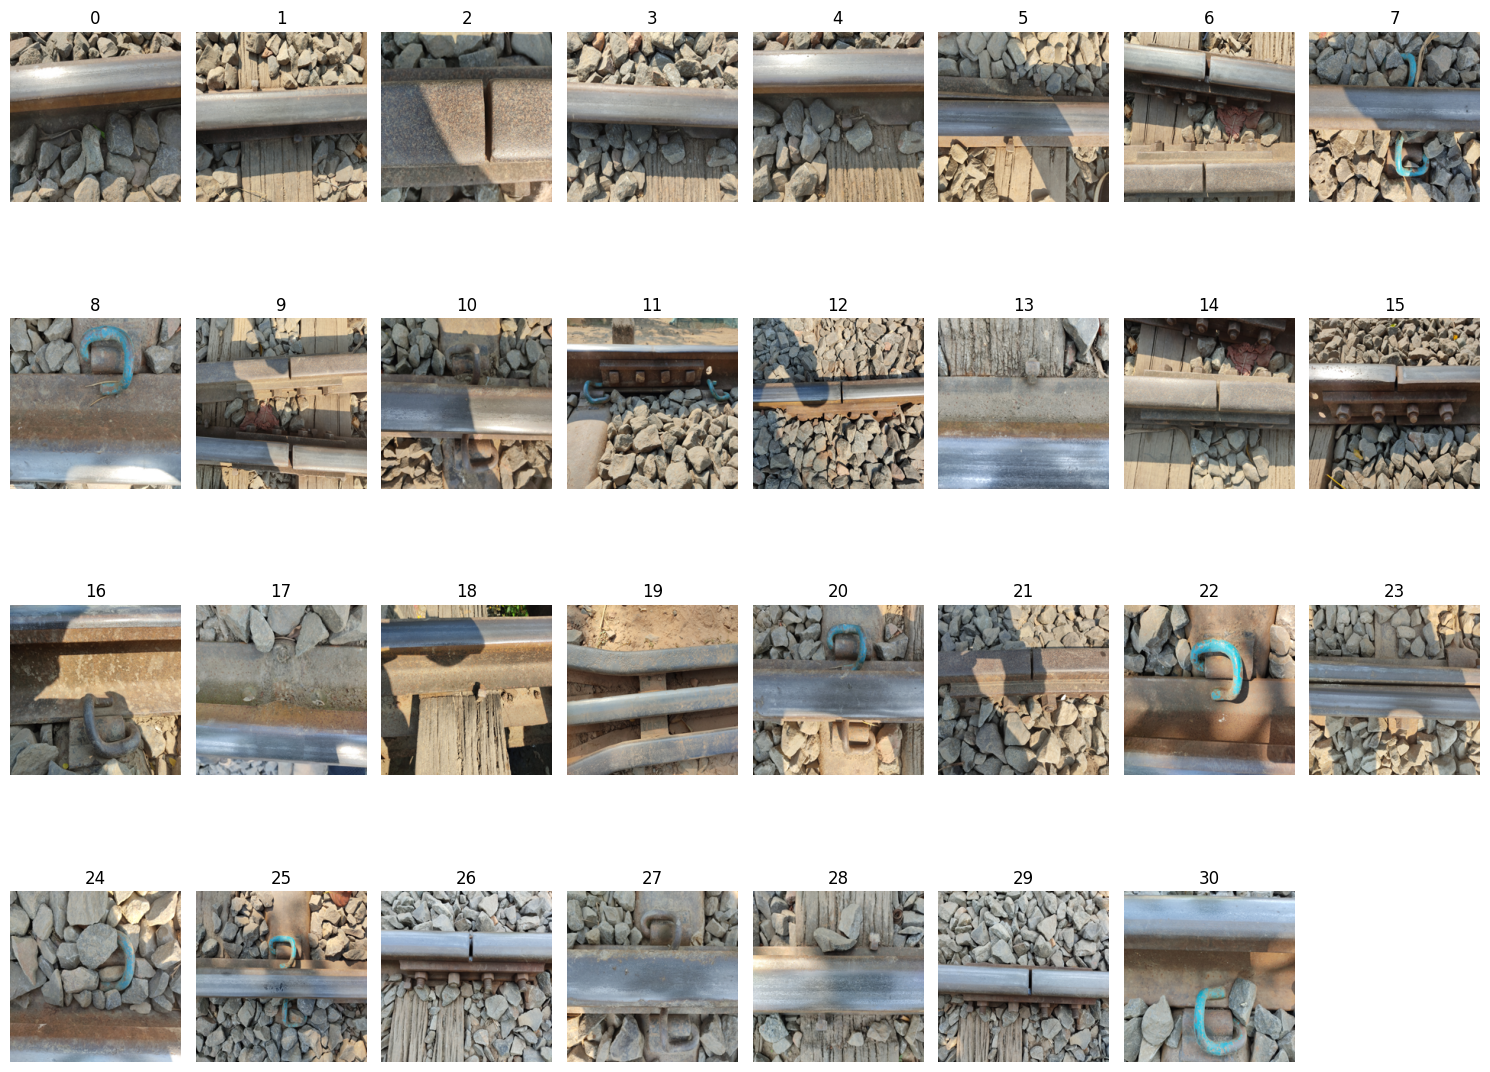

In [11]:
print("Non defective data sample\n")
plt.figure(figsize = (15,12))
for idx,image_path in enumerate(train_ndef[0]):
    if idx==31:
        break
    plt.subplot(4,8,idx+1)
    img = Image.open('/content/Railway Track fault Detection Updated/Train/Non defective/'+image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(idx)
plt.tight_layout()
plt.show()

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Railway Track fault Detection Updated/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Railway Track fault Detection Updated/Validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Railway Track fault Detection Updated/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 299 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.


In [9]:
def normalize(image, label):
  image = tf.cast(image/256, tf.float32)
  return image, label

In [10]:
train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [11]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2


In [12]:
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import image_dataset_from_directory

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Railway Track fault Detection Updated/Train',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/Railway Track fault Detection Updated/Validation',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [17]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 8,787,905 (33.52 MB)

 Trainable params: 8,786,689 (33.52 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping, reduce_lr])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.5900 - loss: 4.5490 - val_accuracy: 0.5000 - val_loss: 5.1240 - learning_rate: 0.0010
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.6401 - loss: 5.1129 - val_accuracy: 0.5000 - val_loss: 6.8966 - learning_rate: 0.0010
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7493 - loss: 5.0352 - val_accuracy: 0.5000 - val_loss: 7.4651 - learning_rate: 0.0010
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7690 - loss: 4.6299 - val_accuracy: 0.5000 - val_loss: 6.3290 - learning_rate: 0.0010
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7470 - loss: 4.0968 - val_accuracy: 0.5000 - val_loss: 4.1646 - learning_rate: 0.0010
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7701 - loss: 3.6114 - val_accuracy: 0.5000 - val_loss: 3.5241 - learning_rate: 0.0010
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7982 - loss: 3.1997 - val_accuracy: 0.5000 - v

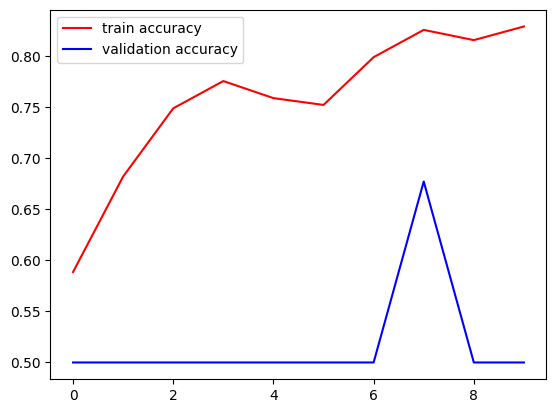

In [24]:
plt.plot(history.history['accuracy'],color='red',label='train accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()

In [25]:
plt.plot(history.history['loss'],color='red',label='train loss')
plt.plot(history.history['val_loss'],color='blue',label='validation loss')
plt.legend()
plt.show()

In [26]:
model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5909 - loss: 2.9259


[2.9259185791015625, 0.5909090638160706]

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predY = model.predict(test_ds)

y_pred = (predY > 0.5).astype(int).flatten()

y_actual = []
for images, labels in test_ds:
    y_actual.extend(labels.numpy())

y_actual = np.array(y_actual)

cm = confusion_matrix(y_actual, y_pred)
print("Confusion Matrix:\n", cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix:
 [[9 2]
 [7 4]]


In [28]:
report = classification_report(y_actual, y_pred, target_names=['Non-Defective', 'Defective'])
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

Non-Defective       0.56      0.82      0.67        11
    Defective       0.67      0.36      0.47        11

     accuracy                           0.59        22
    macro avg       0.61      0.59      0.57        22
 weighted avg       0.61      0.59      0.57        22

